# encoding

#### binary encoding örneği = sex sütununda male female yerine 0 ve 1 ile temsili gibi atama yapma
#### label encoding örneği = educations sütununda preschool secondary school high school yerine 0 1 2 gibi atama yapmak


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" %x)
pd.set_option("display.Width", 500)


In [48]:
df = pd.read_csv("titanic.csv")
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]
# label encoder alfabetik öncelik olarak female ve male de female e 0  atar male e 1 atar

array([1, 0, 0, 0, 1])

In [49]:
# ama diyelimki unuttuk 1 ve 0 neye karşılık geliyordu diye sorduk
le.inverse_transform([0,1]) # 0 = female, 1 = male olduğunu gördük

array(['female', 'male'], dtype=object)

In [50]:
# büyük veri seti çağırayım birşey göstercem
dff = pd.read_csv("application_train.csv")
binary_cols = [col for col in dff.columns if dff[col].dtype not in [float, int] and dff[col].nunique() == 2] #sütunları gez ve int,float 
# değilse ve sadece 2 tane eşsiz değer varsa binary cols a ata
# eksik değere encode ugulamak istersen .uniqe        istemezsen .nunique kullanırsın(number uniqe)
binary_cols # kısacası iki değişkenli kategorikleri al

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [51]:
# şimdide bu değişkenlere label encoder uygulayalım
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    dff = label_encoder(dff, col)

dff[binary_cols].head() 
# ama eksik değerlerede label encoding uygulansınmı farkında ol ona göre stratejini belirle

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


#### -------------------------------------------------------------------------------------------------------
### one-hot encoding
#### -------------------------------------------------------------------------------------------------------

In [52]:
# mesela sütunda gs, fb, bjk, ts, bs takımları var bunlara etiket atayamazsın çünkü büyüklüğü neye göre sıralayacaksın
# o yüzden one hot endoing yardımımıza koşar
# sütundaki uniqe değişkenleri ayrı yeni sınıflara koyar
# gs fb bjk ts bs
# 1  0   0   0  0
# 0  1   0   0  0
# 0  0   1   0  0
# 0  0   0   1  0
# 0  0   0   0  1
# şekline getirir

# örnek titanikten
df["Embarked"].value_counts() # 3 tane sınıflar arası fark olmayan değişken çıktı (nominal)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [53]:
pd.get_dummies(df, columns=["Embarked"]).head(3)
# embarked_c embarked_q ve embarked_s oluştu



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True


In [54]:
# dummy değişken tuzağı hatırlatma --> kırmızı mavi yeşil one hot encoding uygularsan 
# kırmızı 1,0,0
# mavi    0,1,0
# yeşil   0,0,1
# kırmızıya gerek yok çünkü mavi ve yeşilin 0 olduğu yer zaten kırmızıdır silmezsek yüksek korelasyon problemi görünür
# bu sorunu ortadan kaldırmak için ilk sütunu sil
pd.get_dummies(df, columns=["Embarked"], drop_first=True).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,True


In [55]:
# eksik değerleride bir sütunda görmek istersek

pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head(3) # çok tercih edilmez ama duruma göre kullanılabilirde

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True,False


In [56]:
# yine hem label encoding hemde one hot encodingi aynı anda basitce uygulayabiliriz
pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head(3) # cinsiyete göre ayırdık

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True


In [57]:
# buda programatik hali
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

# grab col names fonksiyonunuda çağır içinden geç yada
# one_h_enc = [col for col in df.columns if 10 >= df.[col].nunique() > 2] yada bunu kullanver fonksiyona hepsinin içinden geç

# --------------------------------------------------------------------------------
# Rare Encoder
# --------------------------------------------------------------------------------

Rare Encoding'in az görülen kategorileri birleştirerek veya farklı bir kategoriye dönüştürerek overfitting'i önlemeye ve modelin daha iyi genelleştirmesine yardımcı olur

In [58]:
# city city_count
#  a       50
#  b       57
#  c       6
#  d       49
#  e       3
#  f       61
#  g       58
#  h       56
# diyelimki elimizde böyle bir veriseti var burada genelde yüksek değerler varken c ve e satırları düşük değer almış
# ml de genele göre gideriz büyük çoğunluğa bakarız
# buradaki verisetinde örnek e kategorik değişkenini one hot encoder dan geçirdiğimde birsürü sütun oluşacak ama sadece 2 kere gözlemlenmiş
# Eğer kategori sayısı çok fazlaysa, One-Hot Encoding yerine Target Encoding, Frequency Encoding veya Embedding gibi yöntemler daha uygun olabilir.
# Nadir görülen kategoriler modele gereksiz yük bindirebilir ve önemsiz hale gelebilir.
# Model eğitimi sırasında, düşük frekansta görülen kategoriler ya hiç öğrenilemez ya da modele katkısı çok az olur.

# bir eşik değer belirleriz örneğin 25 altı deriz verisetinde 25 altı olanları sileriz

# ama bir ml projesinde %100 olması gereken one-hot-encoding ile label encodingtir
# rare encoding ise ihtiyaca bağlı daha nadir görülür

In [59]:
df = pd.read_csv("application_train.csv")
df["NAME_EDUCATION_TYPE"].value_counts() # buradan değişkenlere baktık ve academic derecenin çok az olduğunu gördük
# yine grap col names fonksiyonu ile kategorik değişkenlere bakıcaz

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [60]:
def grab_col_names(dataframe, cat_th=10, car_th=20): 
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car_cols = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car_cols]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"gözlem: {dataframe.shape[0]}")
    print(f"değişkenler: {dataframe.shape[1]}")
    print(f"categorical columns: {len(cat_cols)}")
    print(f"numeric columns: {len(num_cols)}")
    print(f"cat but car cols: {len(cat_but_car_cols)}")
    print(f"num but cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car_cols


cat_cols, num_cols, cat_but_car = grab_col_names(df)

gözlem: 307511
değişkenler: 122
categorical columns: 54
numeric columns: 67
cat but car cols: 1
num but cat: 39


In [61]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOC

In [62]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("----------------------------------------------------------------------------")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

                    NAME_CONTRACT_TYPE  Ratio
NAME_CONTRACT_TYPE                           
Cash loans                      278232 90.479
Revolving loans                  29279  9.521
----------------------------------------------------------------------------
             CODE_GENDER  Ratio
CODE_GENDER                    
F                 202448 65.834
M                 105059 34.164
XNA                    4  0.001
----------------------------------------------------------------------------
              FLAG_OWN_CAR  Ratio
FLAG_OWN_CAR                     
N                   202924 65.989
Y                   104587 34.011
----------------------------------------------------------------------------
                 FLAG_OWN_REALTY  Ratio
FLAG_OWN_REALTY                        
Y                         213312 69.367
N                          94199 30.633
----------------------------------------------------------------------------
                 NAME_TYPE_SUITE  Ratio
NAME_TYPE_SU

bu fonksiyon ile bütün kategorik değişkenlerin dağılım oranı yüzdesini gördük ve analiz edelim
mesela XNA  4  0.001 bu direkt silinecek çünkü etki oranı 0.001 bunu one hot encodinge sokarsan birton gereksiz kategori oluşur


In [63]:
# rare categoriler ile bağımlı değişken arasındaki ilişkiyi analiz edelim

df.groupby("NAME_INCOME_TYPE")["TARGET"].mean() # mesela 0 olan iş insanları krediyi daima ödüyormuş
# ama mesela işsizler yüzde 36 ödeyemiyormuş işte bu şekilde analizleri yapıyoruz
# buradan şu sonuç çıkar mesela rare encodingde iş insanı ile işsizlerin sayısı az bunların arasındaki ilişkiye bakıp
# eğer oranları yakın olsaydı bunları toplayabilirdik ama buda iyice suyunu sıkmak

NAME_INCOME_TYPE
Businessman            0.000
Commercial associate   0.075
Maternity leave        0.400
Pensioner              0.054
State servant          0.058
Student                0.000
Unemployed             0.364
Working                0.096
Name: TARGET, dtype: float64

In [64]:
# bu analiz işlemlerinide bir fonksiyonda toplayalım
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(), "RATİO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n")

şimdiye kadarki rare işlemleri hep analiz içindi artık rare encoder fonksiyonunu yazalım

In [65]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy() # kopyasını al aşağıda kullancaz
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O' # kategorikse ve 
            and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)] #verilen (0.01) parameterdan küçükse rare_col a ata
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df) # temp_df de tüm df vardı ama biz temp_df[var] diyerek sadece rare ları gezecek
                                                         # ve tüm df sütunları sayısına bölüp oran verecek böylece tmp bir oran tutacak
        rare_labels = tmp[tmp < rare_perc].index # tmp eğer fonksiyona yolladığımız orandan küçükse
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var]) # artık belirlediğimiz rarelı sütunları görünce
                                                                                      # onlara "rare" yazıyoruz ki analiz edelim
    return temp_df

new_df = rare_encoder(df, 0.01) # 0.01 altında kalan kategorik değişkenleri verecek

#### gözlemleyemiyorum çünkü lanet olası çekirdek hata verip duruyor ama mantık bu

# -----------------------------------------------------------------------------------------------------
# feature scaling
# -----------------------------------------------------------------------------------------------------

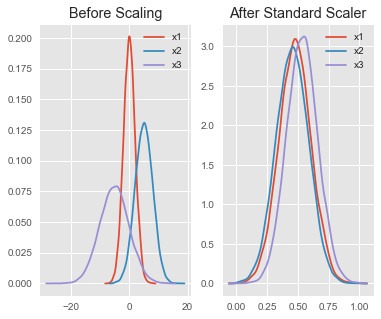

#### mesela elimizde 1 adet grafik ama 3 tane farklı eğri var tıpkı yukarıdaki gibi
#### ilk grafikte
#### x1 = filme 1 ile 10 arası verilen puanlar
#### x2 = filme yapılan yorum sayısı
#### x3 = filme girilen not sayısı

#### bunları ml de aynı kefeye koyamayız birlikte değerlendirmemiz gerekirse feature scaling yaparız ve 2. grafikteki hale döner

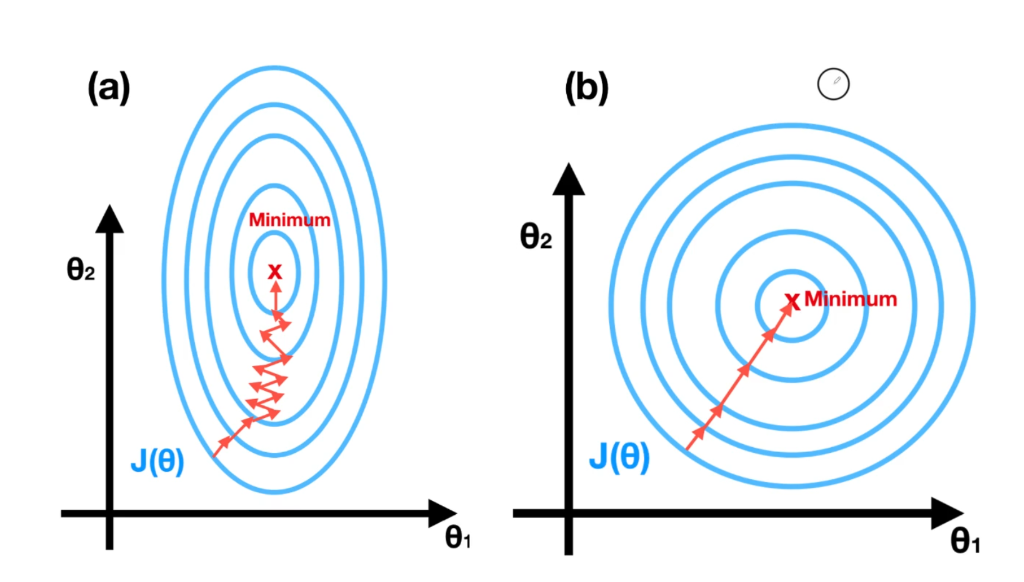

#### veya buradaki gibi gradient descent algoritmalarında ölçeklendirmeden ağaçlara sokarsak ml işlemi uzun sürüyor bu süreyi kısaltmak için
#### ölçeklendirme yaparız ve 2. grafikteki gibi sonuca en hızlı şekilde yaklaşmasını sağlarız
#### çoğu yerde kullanmalıyız standarlaştırmayı ama ağacı dayalı yöntemler etkilenmiyor (yinede kullan gitsin tek zararı yok)

## ----------------------------
##### standart scaler = klasiktir ortalamayı çıkar standart sapmaya böl z = (x-u)/s
## ----------------------------


In [66]:
df = pd.read_csv("titanic.csv")
ss = StandardScaler()
df["Age_Standart_Scaler"] = ss.fit_transform(df[["Age"]]) # önce agei ss ettik sonra karşılaştırmak için yeni age_standart_scaler a ekledik
df["Age_Standart_Scaler"].head()


0   -0.530
1    0.572
2   -0.255
3    0.365
4    0.365
Name: Age_Standart_Scaler, dtype: float64

In [68]:
# ama ortalamada standart sapmada aykırı değerlerden etkilenir o yüzden birde robust scaler yöntemi var
# ortalama yerine aykırı değerlerden etkilenmeyen medyana bölsek ve standart sapma yerinede iqr a bölsek daha iyi

# robust scaler = medyanı çıkart iqr a böl

rs = RobustScaler() # standart scaler dan daha iyidir
df["Age_Robust_Scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T
# burada standart scaler aykırı değerlerden etkilendiği için max değeri 3.465
# ama robust scaler etkilenmediği için daha optimal 2.909 da


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_Standart_Scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_Robust_Scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


## -----------------------------------
#### min_max scaler = özellikle 0-1 , 1-5 , 1-10 gibi aralıklarda dönüştürme ile standartlaştırma yapılacaksa kullanılır
#### x_std = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
#### x_scaled = x_std * (max-min) + min
## -----------------------------------

In [69]:
mms = MinMaxScaler()
df["Age_Min_Max_Scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T
# min değer 0     ve max değer 1    yani 0-1 aralığında standartlaştırmış

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_Standart_Scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_Robust_Scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_Min_Max_Scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


# !!!!
##### hangi standarlaştırma algoritmasını seçtiğin önemli değildir hepsini dene grafiğe bak değişmediğini görürsün
##### değişen tek şey grafikte ki temsil sayısıdır yani aslında hiçbirşey değişmiyor sadece ml nin anlayabileceği standart sayılarda
##### ifade etmiş oluyoruz yoksa elimizdeki grafiği veriyi hiçbirşekilde değiştirmiyor 100 ile temsil edilen değer 0.1 ile temsil ediliyor
##### ama makinada 100 ile değil 0.1 ile anlıyor mesela

In [72]:
# birde son olarak
# sayısal değişkeni kategorik değişkene çevirme metodunu gösterelim
# binning işlemi denir
df["Age_qcut"] = pd.qcut(df["Age"], 5)
df.head(3)
# burada age i 5 tane kategoriye böldük 
# df["Age_qcut"] = pd.qcut(df["Age"], 5, labels=Label_yolu_yaz) bu şekilde ise o 5 e ayrılan label lara isim verebilirdik


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Standart_Scaler,Age_Robust_Scaler,Age_Min_Max_Scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321,"(25.0, 31.8]"
